In [1]:
import sys
import os

notebook_cwd = os.getcwd()
src_path = os.path.join(notebook_cwd, '..')
if src_path not in sys.path:
    sys.path.append(src_path)


In [2]:
%matplotlib inline

from dataclasses import replace

import numpy as np

from dataclasses import dataclass, replace, asdict

import numpy as np
from pydantic import BaseModel
import matplotlib.pyplot as plt
from ipywidgets import FloatSlider
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from src.common_utils.custom_vars import InterferometerType, Wvn
from src.common_utils.transmittance_response import TransmittanceResponse
from src.direct_model.interferometer import interferometer_factory, Interferometer
from src.outputs.visualization import SubplotsOptions, RcParamsOptions
from src.demo.paper.sampling import SamplingOptionsSchema
from src.demo.paper.sampling import visualize_all
from src.demo.paper.sampling import dct_orthogonalize
from src.demo.paper.sampling import plot_harmonic_orders
from src.demo.paper.sampling import plot_condition_numbers




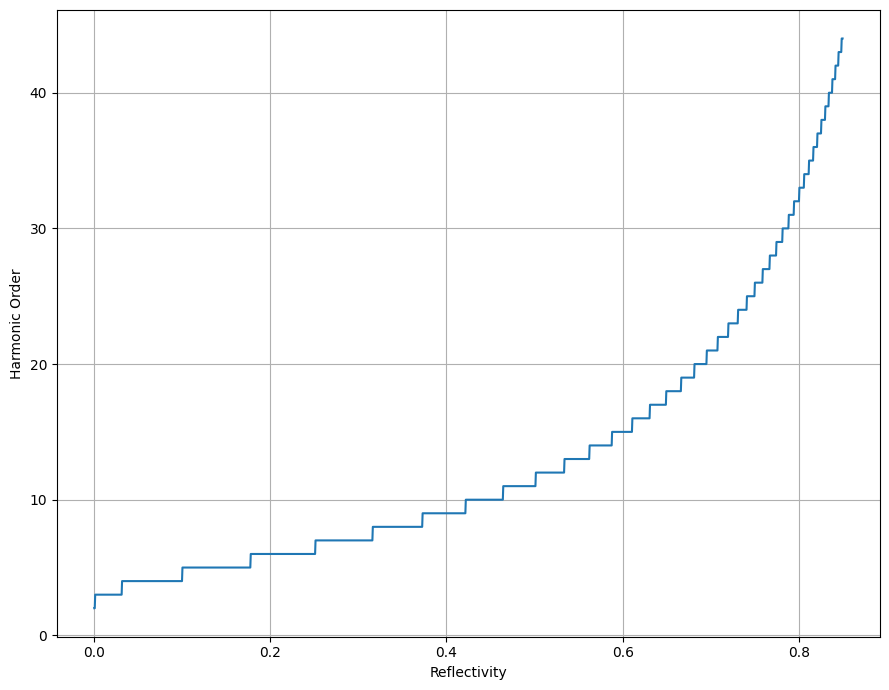

In [3]:
coefficient_threshold = 0.001

fig, axs = plt.subplots(nrows=1, ncols=1, squeeze=False, figsize=(9, 7), tight_layout=False)
fig, axs = plot_harmonic_orders(
    fig,
    axs[0, 0],
    reflectivity_range=[0.0005, 0.85],
    threshold=coefficient_threshold,
)
plt.show()


In [4]:
def update_plot(reflectance_scalar):
    sampling_options_schema = {
        "device": {
            "type": InterferometerType.FABRY_PEROT,
            "reflectance_scalar": reflectance_scalar,
            "opds": {
                "num": 51,
                "step": 0.2,
            },
        },
        "spectral_range": {
            "min": 1.,
            "max": 2.5,
        },
    }
    options = SamplingOptionsSchema(**sampling_options_schema)
    experiment = options.create_experiment()
    transfer_matrix = experiment.transfer_matrix()

    fig, axs = plt.subplots(nrows=2, ncols=2, squeeze=False, figsize=(9, 6), tight_layout=False)
    fig, axs = visualize_all(
        fig, axs,
        transfer_matrix=transfer_matrix,
        opd_idx=49,
        linewidth=1.5,
        dct_orthogonalize_kwargs={"device_type": options.device.type, "reflectance": options.device.reflectance_scalar},
    )
    plt.show()

reflectance_slider = FloatSlider(min=0.01, max=0.900, step=0.01, value=0.01, description='Reflectance Scalar:')
interactive_plot = interactive(update_plot, reflectance_scalar=reflectance_slider)
output = interactive_plot.children[-1]
output.layout.height = '800px'
interactive_plot


interactive(children=(FloatSlider(value=0.01, description='Reflectance Scalar:', max=0.9, min=0.01, step=0.01)…

50it [00:05,  8.76it/s]


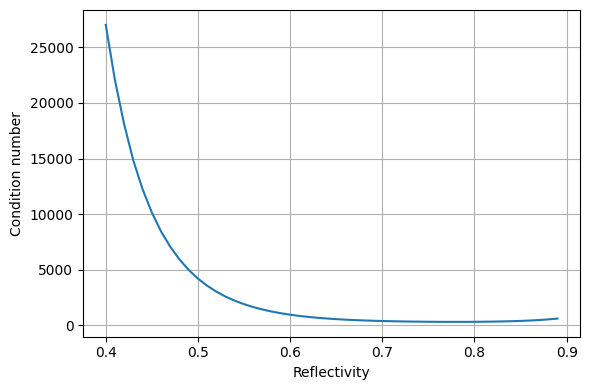

In [23]:
opd_schema = {"num": 319, "step": 0.175}

fig, axs = plt.subplots(nrows=1, ncols=1, squeeze=False, figsize=(6, 4), tight_layout=False)
fig, axs = plot_condition_numbers(
    fig,
    axs[0, 0],
    opd_schema=opd_schema,
    reflectivity_range=(0.4, 0.9, 0.01),
)
plt.show()
